<a href="https://colab.research.google.com/github/lima-douglas/ModeloPreditivo_Desafio/blob/main/Modelo_de_predicao_Frexco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DESAFIO:

Previsão de demanda é uma projeção realizada com o intuito de prever o potencial de vendas de um ou mais produtos em um cenário futuro. 

Com base em dados e informações, numéricas e intencionais, o objetivo da previsão é aproximar ao máximo a perspectiva da realidade. Embora não seja possível determinar as ações do futuro, a estimativa permite guiar a tomada de decisão e elaborar um planejamento mais estratégico, voltado para as possibilidades reais do negócio.

Nos diversos setores, a previsão de demanda serve de amparo para nortear e orientar as ações mais importantes.

Nós, da Frexco, trabalhamos com produtos perecíveis e muitos deles possuem uma data de validade curta. Acertar na previsão de demanda é essencial para evitarmos o desperdício de alimentos, além de também ser importante garantir que tenhamos o produto disponível no estoque para venda.

Tendo isso em mente, estruture um script no Python que calcule a previsão de demanda para os próximos 5 dias do item, baseando-se no histórico presente na base de dados em anexo.

Obs: O modelo de previsão pode ser o que você julgue ser o melhor, mas atenção aos detalhes de variação nas vendas!

## RESOLUÇÃO

A partir disso, será criado um modelo de previsão utilizando os dados fornecidos.

Observando os dados, foi escolhido o modelo de previsão **ARIMA**.



### 1. Importação

In [2]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as md
from google.colab import auth
from statsmodels.tsa.arima.model import ARIMA
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")

Leitura de dados:

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dados = pd.read_excel('/content/drive/MyDrive/Dados.xlsx',header=0,index_col=0).sort_index()

Será criada uma função MAPE (Mean Absolute Percentage Error) que será utilizada no futuro para calcular o erro dos parametros passados para o ARIMA

In [5]:
def mape(actual, pred):
   return np.mean(np.abs((actual - pred) / actual)) * 100

## 2. Analisando os dados

Primeiramente vamos visualizar a quantidade de linhas e colunas da base de dados. Então os dados serão plotados em função do tempo.

In [6]:
print("Numero de linhas:", dados.shape[0])
print("Numero de colunas: ", dados.shape[1])
print(dados.index)

Numero de linhas: 46
Numero de colunas:  1
DatetimeIndex(['2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09',
               '2022-12-10', '2022-12-11', '2022-12-12', '2022-12-13',
               '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-17',
               '2022-12-18', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31', '2023-01-01', '2023-01-02',
               '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06',
               '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10',
               '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-14',
               '2023-01-15', '2023-01-16', '2023-01-17', '2023-01-18',
               '2023-01-19', '2023-01-20'],
              dtype='datetime64[ns]', name='Data', freq=None)


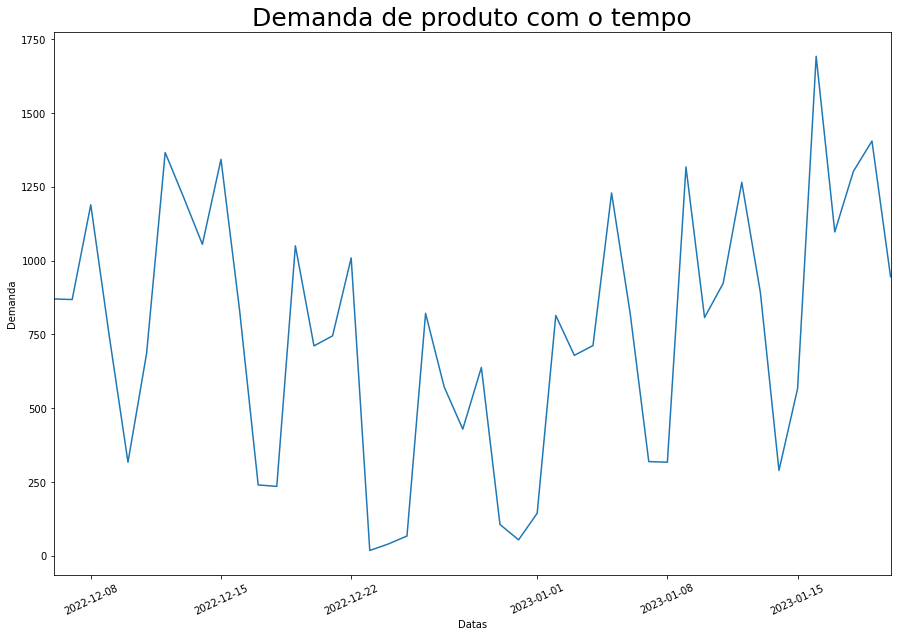

In [7]:
plt.figure(figsize = (15, 10))
plt.plot(dados.index, dados.Vendas)
plt.title("Demanda de produto com o tempo", fontsize=25)
plt.ylabel("Demanda")
plt.xlabel("Datas")
plt.xticks( rotation=25 )
plt.xlim([datetime.date(2022, 12, 6), datetime.date(2023, 1, 20)])
plt.show()


Por fim, uma analise geral dos dados que foram fornecidos:

In [8]:
print(dados.describe().transpose())

        count        mean         std   min    25%    50%      75%     max
Vendas   46.0  755.434783  430.762201  18.0  346.5  810.5  1053.75  1692.0


## 3. Criação do modelo ARIMA

Primeiramente vamos encontrar os parametros que satisfazem nosso modelo:


In [9]:
parametros = [
(1, 1, 1),
(1, 0, 1),
(2, 1, 1),
(3, 1, 1),
(4, 1, 1),
(5, 1, 1),
(2, 1, 2),
(3, 1, 2),
(4, 1, 3),
(5, 1, 3),
(1, 1, 4),
(2, 1, 4),
(3, 1, 4),
(4, 1, 4),
(5, 1, 4),
(10, 1, 1),
(10, 0, 1),
(10, 1, 2),
(10, 1, 3),
(10, 1, 4),
(10, 1, 5)
]

for param in parametros:
   try:
      model = ARIMA(dados.Vendas, order=param).fit()
      acc = mape(dados.Vendas, model.predict(typ = "levels"))
      print("Parametros: ", param, "MAPE:", acc)
   except:
      pass


Parametros:  (1, 1, 1) MAPE: 213.57785683292212
Parametros:  (1, 0, 1) MAPE: 196.70859334266612
Parametros:  (2, 1, 1) MAPE: 199.24043964646495
Parametros:  (3, 1, 1) MAPE: 200.09465704232738
Parametros:  (4, 1, 1) MAPE: 178.03546182258071
Parametros:  (5, 1, 1) MAPE: 174.32613125617937
Parametros:  (2, 1, 2) MAPE: 187.0039037724176
Parametros:  (3, 1, 2) MAPE: 187.45336191015048
Parametros:  (4, 1, 3) MAPE: 166.10402244800545
Parametros:  (5, 1, 3) MAPE: 153.86847882419687
Parametros:  (1, 1, 4) MAPE: 187.24836590012418
Parametros:  (2, 1, 4) MAPE: 174.9736796035992
Parametros:  (3, 1, 4) MAPE: 170.30163180458334
Parametros:  (4, 1, 4) MAPE: 164.55123131865093
Parametros:  (5, 1, 4) MAPE: 132.05329991727783
Parametros:  (10, 1, 1) MAPE: 112.1875544225231
Parametros:  (10, 0, 1) MAPE: 108.86081267875703
Parametros:  (10, 1, 2) MAPE: 111.07229877861364
Parametros:  (10, 1, 3) MAPE: 112.88854920710311
Parametros:  (10, 1, 4) MAPE: 106.85520971376899
Parametros:  (10, 1, 5) MAPE: 107.8475

Observando o resultado obtido acima, conclui-se que os parametros mais indicados, isto é, com menor erro é (10, 1, 4). Portanto será adotado este para o modelo ARIMA.

## Treinamento do modelo

Portanto, com os parametros acima, será treinado o modelo.


In [10]:
modelo = ARIMA(dados.Vendas, order=(10,1,4)).fit()
acc = mape(dados.Vendas, modelo.predict(typ="levels"))
print("Mean Absolute Percentage Error: ", acc)

Mean Absolute Percentage Error:  106.85520971376899


Para analisar a confiabilidade do modelo adotado, será comparado com os valores estimados com os reais.

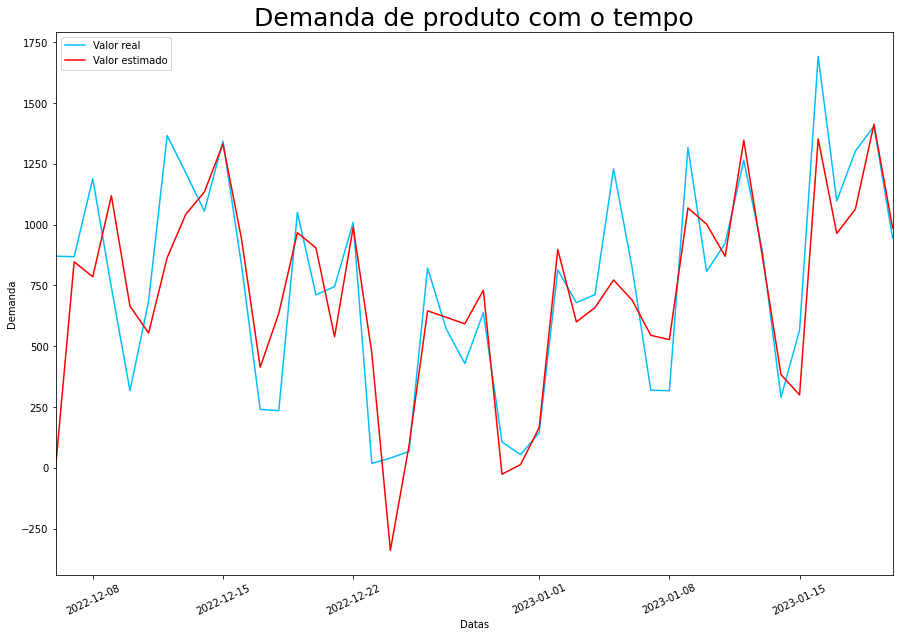

In [16]:
fig, ax = plt.subplots(figsize=(15, 10))
actual = ax.plot(dados.Vendas, color="deepskyblue")
pred = ax.plot(modelo.predict(typ="levels"), color="red")
plt.title("Demanda de produto com o tempo", fontsize=25)
plt.ylabel("Demanda")
plt.xlabel("Datas")
plt.xticks( rotation=25 )
plt.xlim([datetime.date(2022, 12, 6), datetime.date(2023, 1, 20)])
ax.legend(['Valor real', 'Valor estimado'])

plt.show()

Ainda, pode-se fazer uma analise geral dos dados preditos, para comparar com o esperado.

In [25]:
print((modelo.predict(typ="levels").describe()), '\n\n', dados.describe())

count      46.000000
mean      717.283176
std       391.680908
min      -339.917962
25%       540.440434
50%       750.953967
75%       981.279826
max      1412.642292
Name: predicted_mean, dtype: float64 

             Vendas
count    46.000000
mean    755.434783
std     430.762201
min      18.000000
25%     346.500000
50%     810.500000
75%    1053.750000
max    1692.000000


## 4. Estimado para valores futuros

Criado o modelo e comparando com os valores reais, percebe-se que esta proximo do esperado. Agora, será estimado para 5 dias posteriores a ultima data. Assim tem-se:

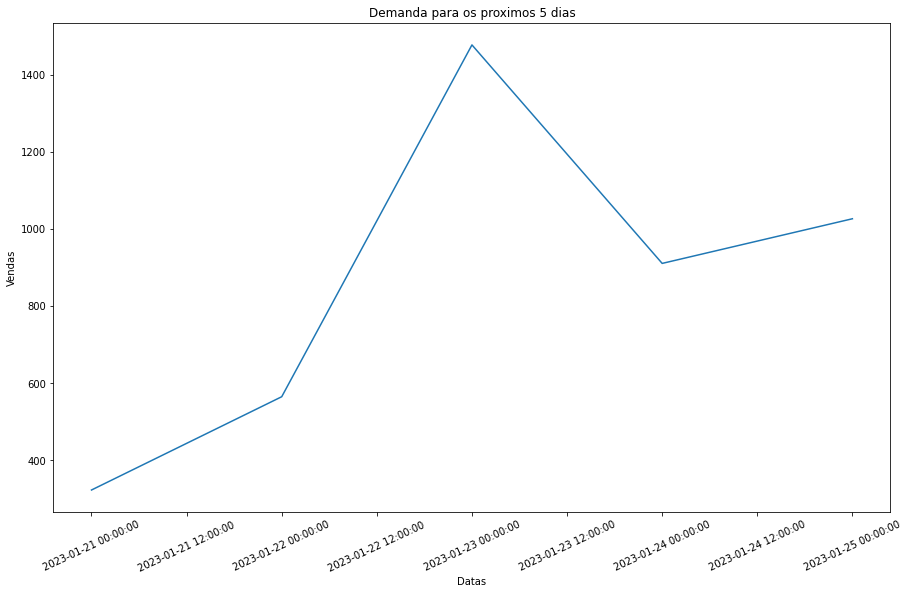


 A estimativa para os proximos 5 dias são:



2023-01-21     322.477307
2023-01-22     564.434493
2023-01-23    1476.961688
2023-01-24     910.231459
2023-01-25    1026.041398
Freq: D, Name: predicted_mean, dtype: float64

In [26]:
forecasting = modelo.forecast(5, alpha=0.05)
plt.subplots(figsize=(15, 10))
plt.title('Demanda para os proximos 5 dias')
plt.xlabel('Datas')
plt.ylabel('Vendas')
datas = forecasting.index
datenums=md.date2num(datas)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(datenums,forecasting)
plt.show()

print("\n A estimativa para os proximos 5 dias são:\n")
display(forecasting)